In [12]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [13]:
def load_dataset():
    df = pd.read_csv('c:/workspace/dillon.csv')
    df['li'] = pd.read_csv('c:/workspace/li.csv')

    # Remove data with NaN values
    df = df.dropna()

    # Separate the datasets
    X = df.drop(['date', 'hour', 'li'], axis=1)
    Y = df['li']
    
    # Scale the X dataset
    X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X), columns=X.columns)

    return X, Y

def select_best_features(x_, y_, count_: int):
    X_best = pd.DataFrame(SelectKBest(mutual_info_regression, k=count_).fit_transform(x_, y_))

    selected_features = []
    for i in range(len(X_best.columns)):
       for j in range(len(x_.columns)):
           if (X_best.iloc[:, i].equals(x_.iloc[:,j])):
               selected_features.append(x_.columns[j])

    print(f"Selected features: {selected_features}")
    
    return X_best

def reduce_features(x_, y_, count_: int):
    pca = PCA(n_components = count_, svd_solver='randomized')
    X_best = pca.fit_transform(x_, y_)
    
    return X_best

def make_graph(y_test, y_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ax1.title.set_text('Interesting Region')
    ax1.scatter(y_test, y_pred)
    ax1.plot((-14, 50), (-14, 50), c='k')
    ax1.set_xlabel('actual')
    ax1.set_ylabel('prediction')
    ax1.set_ylim(-14, 6)
    ax1.set_xlim(-14, 6)

    ax2.title.set_text('Full Region')
    ax2.scatter(y_test, y_pred)
    ax2.plot((-14, 50), (-14, 50), c='k')
    ax2.set_xlabel('actual')
    ax2.set_ylabel('prediction')

    plt.show()

def rake_features(method_, X_, Y_):
    for select_feature_count in [1, 2, 3, 4, 5, 10, 15, 20, 25, 50, 75, 100, 200]:
        #X = select_best_features(X, Y, select_feature_count)
        X = reduce_features(X_, Y_, select_feature_count)
        
        x_train, x_test, y_train, y_test = train_test_split(X, Y_, test_size=0.2)
        linear_model = method_.fit(x_train, y_train)
        y_pred = linear_model.predict(x_test)
        print(f"{select_feature_count}: Training_score: {linear_model.score(x_train, y_train):.3f}", f"Testing_score: {r2_score(y_test, y_pred):.3f}")

def run_model(method_, x_train, y_train, x_test, y_test):
    linear_model = method_.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print(f"Training_score: {linear_model.score(x_train, y_train):.3f}", f"Testing_score: {r2_score(y_test, y_pred):.3f}")

    return y_test, y_pred


In [19]:
X, Y = load_dataset()

print("Ridge")
rake_features(Ridge(), X, Y)

Ridge
1: Training_score: 0.337 Testing_score: 0.342
2: Training_score: 0.455 Testing_score: 0.450
3: Training_score: 0.500 Testing_score: 0.485
4: Training_score: 0.524 Testing_score: 0.505
5: Training_score: 0.547 Testing_score: 0.534
10: Training_score: 0.659 Testing_score: 0.675
15: Training_score: 0.803 Testing_score: 0.807
20: Training_score: 0.825 Testing_score: 0.833
25: Training_score: 0.899 Testing_score: 0.896
50: Training_score: 0.942 Testing_score: 0.941
75: Training_score: 0.956 Testing_score: 0.957
100: Training_score: 0.972 Testing_score: 0.972
200: Training_score: 0.982 Testing_score: 0.981


In [32]:
# X_reduced = select_best_features(X, Y, select_feature_count)
X_reduced = pd.DataFrame(reduce_features(X, Y, 10))
X_reduced = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_reduced))
X_reduced.sample(5)

,0,1,2,3,4,5,6,7,8,9
7729,-0.659171,-0.429938,-0.158118,0.417101,1.269710,0.707147,-1.426962,1.244712,0.009029,-0.567943
3886,0.122379,-0.823500,1.880129,-0.532384,0.884750,2.235339,-0.732532,-0.754386,0.914895,1.691183
13170,-0.582547,-0.605927,-0.430198,-0.657182,0.092800,0.745324,1.131543,0.288553,-2.025081,1.318455
22375,1.582476,0.772672,-1.019680,-1.407108,-0.219953,0.593505,0.182215,-0.253450,-0.443232,-0.178630
10753,-0.251858,0.364886,0.785299,2.166969,1.452683,0.023329,-1.595469,0.095446,-1.181776,0.490996


MLPRegressor
Iteration 1, loss = 99.47033577
Iteration 2, loss = 96.78224084
Iteration 3, loss = 92.58708767
Iteration 4, loss = 86.98707874
Iteration 5, loss = 81.50739398
Iteration 6, loss = 77.09651213
Iteration 7, loss = 73.44480402
Iteration 8, loss = 70.23434700
Iteration 9, loss = 67.33270789
Iteration 10, loss = 64.67654569
Iteration 11, loss = 62.22515039
Iteration 12, loss = 59.94345501
Iteration 13, loss = 57.81258233
Iteration 14, loss = 55.81219308
Iteration 15, loss = 53.92997495
Iteration 16, loss = 52.13968912
Iteration 17, loss = 50.44078026
Iteration 18, loss = 48.81160284
Iteration 19, loss = 47.25469020
Iteration 20, loss = 45.77435492
Iteration 21, loss = 44.36100278
Iteration 22, loss = 43.01132522
Iteration 23, loss = 41.71736985
Iteration 24, loss = 40.49317274
Iteration 25, loss = 39.32180775
Iteration 26, loss = 38.19710769
Iteration 27, loss = 37.12416664
Iteration 28, loss = 36.09633210
Iteration 29, loss = 35.11556174
Iteration 30, loss = 34.18057234
Iterat

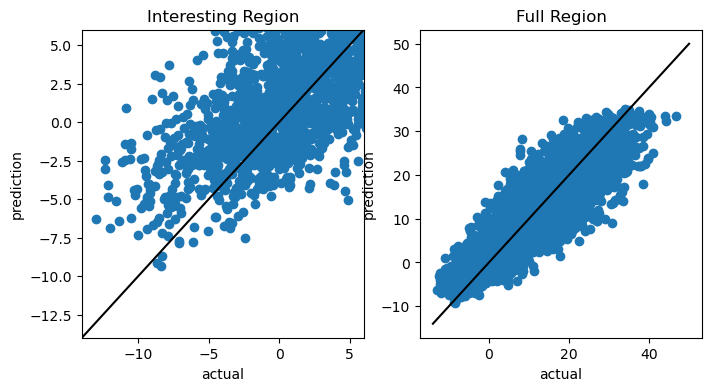

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2)

print("MLPRegressor")
y_test, y_pred = run_model(MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 3), max_iter=2000, verbose=True), x_train, y_train, x_test, y_test)
make_graph(y_test, y_pred)

del x_train, x_test, y_train, y_test, y_pred